# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Anaking Faiqal Lufi
- **Email:** faiqalanaking@gmail.com
- **ID Dicoding:** Anaking Faiqal

## Menentukan Pertanyaan Bisnis

- Apakah ada pola musiman atau bulanan dalam penyewaan sepeda?
- Faktor apa yang lebih mempengaruhi penyewaan sepeda untuk pengguna kasual vs terdaftar?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

Pada tahapan ini, kita akan mencoba untuk memahami data yang kita kerjakan. Ada beberapa tahapan yang akan kita lakukan dalam proses Data Wrangling yaitu:

1. Gathering Data - Proses mengumpulkan data
2. Assessing Data - Proses memahami kualitas dan struktur data
3. Cleaning Data - Pembersihan data dari permasalahan yang ditemukan

Mari kita mulai dengan tahapan pengumpulan data.

### Gathering Data

Pada bagian ini kita akan mengumpulkan data dan mengubahnya menjadi DataFrame yang bisa kita gunakan untuk analisa lebih lanjut.

In [2]:
# Mengambil hour csv
hour_df = pd.read_csv('hour.csv')
# Mengambil day csv
day_df = pd.read_csv('day.csv')

Mari kita lihat sturktur data dari masing-masing DataFrame.

In [3]:
# Melihat DataFrame hour
print(f"Panjang records pada hour_df: {len(hour_df)}")
hour_df.head(5)

Panjang records pada hour_df: 17379


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Melihat DataFrame day
print(f"Panjang records pada day_df: {len(day_df)}")
day_df.head(5)

Panjang records pada day_df: 731


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Setelah melakukan analisa pada data yang telah dikumpulkan, kita mendapati bahwa dataset tersebut merupakan data historical log dari salah satu sistem Bikeshare di Washington D.C USA pada tahun 2011 dan 2012.
- Dataset terbagi menjadi dua agregasi yaitu berdasarkan basis jam (hour_df) dalam setiap hari dan dalam basis hari (day_df).
- Data dalam basis jam memiliki cakupan data yang lebih spesifik dan bisa dianalisis lebih mendetail, sedangkan data dalam basis hari memberikan gambaran yang lebih luas terkait log sistem Bikeshare.
- Terdapat beberapa data yang bersifat ***categorical*** yang direpresentasikand dalam bentuk numerik sehingga dalam proses analisis perlu mengacu pada arahan resmi yang disediakan oleh publisher dataset.

### Assessing Data

Setelah memahami struktur data, mari kita analisa lebih lanjut terkait kualitas data. Pada tahapan ini kita akan mencari apakah terdapat permasalahan dalam data yang akan kita analisis.

### Assessing data hour

Mari kita mulai dengan menilai data historical log dalam basis jam.

In [5]:
# Memeriksa info dan tipe data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Memeriksa missing values
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Memeriksa duplikasi data
print(f"Jumlah duplikasi data: {hour_df.duplicated().sum()}")

Jumlah duplikasi data: 0


In [8]:
# Memeriksa sebaran nilai statistik data
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing data day

Mari kita lanjutkan dengan memeriksa data historical log dalam basis day

In [9]:
# Memeriksa info dan tipe data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
# Memeriksa missing values
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [11]:
# Memeriksa duplikasi
print(f"Jumlah duplikasi data: {day_df.duplicated().sum()}")

Jumlah duplikasi data: 0


In [12]:
# Memeriksa sebaran nilai statistik data
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada data hour dan day, kolom `dteday` memiliki tipe data yang bukan date. Kita akan mengubahnya dalam tahapan selanjutnya
- Baik dalam data hour dan day, kolom yang bersifat ***categorical*** masih direpresentasikan dalam bentuk numerik. Kita akan mengubahnya dalam tahapan selanjutnya.

### Cleaning Data

### Cleaning hour data

Mari kita mulai membersihkan data historical log dalam basis hour. Berikut ini beberapa hal yang akan kita lakukan dalam tahapan clening data:
1. Mengubah tipe data kolom `dteday` menjadi date
2. Mengubah representasi numerik menjadi nama kategori sesuai dengan dokumentasi dataset publisher

In [13]:
# Mengubah tipe data dteday
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mari kita ubah representasi numerik semua kolom menjadi nama kategori.

In [14]:
def clean_category(df):
  # Mengubah representasi tahun
  year_map = {0: 2011, 1: 2012}
  df['yr'] = df['yr'].map(year_map)

  # Mengubah representasi bulan
  month_map = {
      1: 'January',
      2: 'February',
      3: 'March',
      4: 'April',
      5: 'May',
      6: 'June',
      7: 'July',
      8: 'August',
      9: 'September',
      10: 'October',
      11: 'November',
      12: 'December'
  }

  df['mnth'] = df['mnth'].map(month_map)

  # Mengubah representasi musim
  season_map = {
      1: 'Spring',
      2: 'Summer',
      3: 'Fall',
      4: 'Winter'
  }
  df['season'] = df['season'].map(season_map)

  # Mengubah representasi holiday
  holiday_map = {0: 'no', 1: 'yes'}
  df['holiday'] = df['holiday'].map(holiday_map)

  # Mengubah representasi weekday
  weekday_map = {
      0: 'Sunday',
      1: 'Monday',
      2: 'Tuesday',
      3: 'Wednesday',
      4: 'Thursday',
      5: 'Friday',
      6: 'Saturday'
  }
  df['weekday'] = df['weekday'].map(weekday_map)

  # Mengubah representasi workingday
  workingday_map = {0: 'No', 1: 'Yes'}
  df['workingday'] = df['workingday'].map(workingday_map)

  # Mengubah weatherlist
  weatherlist_map = {
      1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
      2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
      3: 'Light Snow, Light',
      4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
  }
  df['weathersit'] = df['weathersit'].map(weatherlist_map)

In [15]:
# Mari kita ubah dataframe kita
clean_category(hour_df)
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,no,Saturday,No,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


In [16]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Setelah menyelesaikan cleaning data hour, sekarang kita akan memberishkan data day dengan memanfaatkan function yang kita buat.

### Cleaning day data

In [17]:
# Mengubah tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [18]:
# Menggunakan function untuk membersihkan data kategori
clean_category(day_df)
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,no,Saturday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,no,Sunday,No,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,no,Monday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,no,Tuesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,no,Wednesday,Yes,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Dataset yang digunakan sudah cukup bersih dan kita hanya perlu melakukan beberapa tahap pembersihan seperti mengubah tipe data dan mengganti representasi data kategori.
- Dataset yang sudah dibersihkan sudah siap digunakan untuk tahap Exploratory Data Analysis (EDA)

## Exploratory Data Analysis (EDA)

Pada tahap ini, kita akan melakukan eksplorasi terhadap data kita. Di sini kita akan mengacu terhadap pertanyaan bisnis yang sudah didefinisikan sebelumnya yaitu:

- Apakah ada pola musiman atau bulanan dalam penyewaan sepeda?
- Faktor apa yang lebih mempengaruhi penyewaan sepeda untuk pengguna kasual vs terdaftar?

### Explore 1: Pola musiman atau bulanan penyewa

Mari kita gunakan day_df untuk melihat tren pola musiman dan bulanan penyewa.

In [20]:
# Melihat jumlah penyewa setiap musim
day_df.groupby('season')['cnt'].sum().sort_values(ascending=False)

,cnt
season,
Fall,1061129
Summer,918589
Winter,841613
Spring,471348


In [21]:
# Melihat total penyewa setiap bulan
day_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)

,cnt
mnth,
August,351194
June,346342
September,345991
July,344948
May,331686
October,322352
April,269094
November,254831
March,228920


### Explore 2: Faktor yang mempengaruhi penyewaan sepeda untuk pengguna kasual vs terdaftar

Mari kita analisa apakah ada faktor faktor tertentu yang mempengaruhi jumlah pengguna kasual vs terdaftar. Kita akan melihat beberapa kaitannya dengan variable:

* Jam
* Workingday
* Musim

In [22]:
# Melihat jumlah pengguna kasual dan terdaftar berdasarkan jam (sort by casual)
hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='casual', ascending=False)

,casual,registered
hr,,
14,55089,120563
15,54606,128543
17,54220,282640
16,53834,173914
13,52713,132206
12,49718,134696
18,44496,265276
11,43286,108034
19,35505,191284


Berikut ini merupakan urutan jam dengan pengguna kasual paling tinggi ke paling rendah.

In [23]:
# Melihat jumlah pengguna kasual dan terdaftar berdasarkan jam (sort by registered)
hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
}).sort_values(by='registered', ascending=False)

,casual,registered
hr,,
17,54220,282640
18,44496,265276
8,15761,245240
19,35505,191284
16,53834,173914
7,8037,146134
20,26378,138172
9,22458,136980
12,49718,134696


In [24]:
# Melihat jumlah pengguna kasual dan terdaftar berdasarkan workingday
hour_df.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
workingday,,
No,316732,683537
Yes,303285,1989125


In [25]:
# Melihat jumlah pengguna kasual dan terdaftar berdasarkan musim
hour_df.groupby('season').agg({
    'casual': 'sum',
    'registered': 'sum'
})

,casual,registered
season,,
Fall,226091,835038
Spring,60622,410726
Summer,203522,715067
Winter,129782,711831


**Insight:**
- Jika dilihat berdasarkan musim, musim gugur merupakan musim dengan total penyewa sepeda paling tinggi dan musim semi merupakan musim dengan jumlah penyewa sepeda paling sedikit.
- Jika dilihat berdasarkan bulan, pada bulan - bulan awal dan tepat akhir tahun merupakan bulan dengan jumlah penyewa sepeda paling sedikit. Ini bisa jadi dikarenakan jumlah penyewa sepeda terdampak jumlah libur yang terdapat pada awal dan akhir tahun seperti natal dan malam tahun baru.
- Pola pengguna sepeda kasual lebih banyak berada pada siang sampai sore hari sedangkan jumlah pengguna sepeda registered terdapat pada pagi hari (jam berangkat kerja) dan sore hari (jam pulang kerja). Ini mengindikasikan bahwa penyewa terdaftar mayoritas merupakan pekerja.
- Selain analisa pada jam, jumlah penyewa pada hari kerja juga memvalidasi bahwa penyewa registered mayoritas golongan pekerja karena adanya jumlah lonjakan jumlah penyewa yang sangat tinggi pada pada kategori registered di hari kerja. Sedangkan untuk jumlah kasual cukup stabil antara hari kerja dan bukan hari kerja.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada pola musiman atau bulanan dalam penyewaan sepeda?

Pada bagian ini kita akan visualisasikan temuan pada eksplorasi pertanyaan pertama.

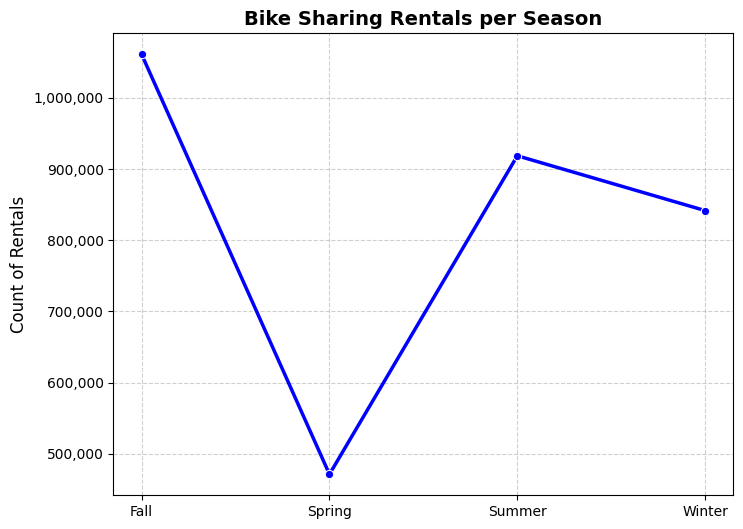

In [26]:
# Menggunakan line chart untuk visualisasi jumlah penyewa berdasarkan musim
season_user_df = day_df.groupby('season')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))

sns.lineplot(x='season', y='cnt', data=season_user_df, marker="o", linewidth=2.5, color='b')

plt.title('Bike Sharing Rentals per Season', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Count of Rentals', fontsize=12)

# Format y-axis dengan ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.grid(True, linestyle='--', alpha=0.6)

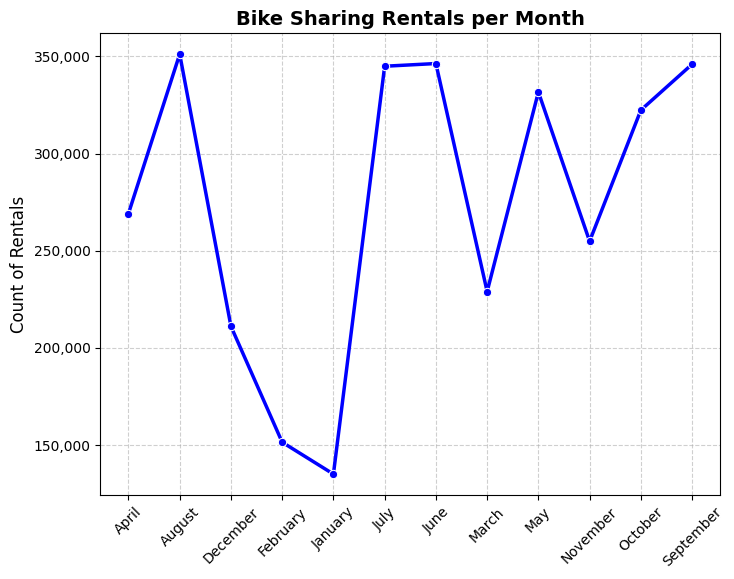

In [27]:
monthly_user_df = day_df.groupby('mnth')['cnt'].sum().reset_index()

plt.figure(figsize=(8, 6))

sns.lineplot(x='mnth', y='cnt', data=monthly_user_df, marker="o", linewidth=2.5, color='b')

plt.title('Bike Sharing Rentals per Month', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count of Rentals', fontsize=12)

# Format y-axis dengan ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.grid(True, linestyle='--', alpha=0.6)

### Pertanyaan 2: Faktor apa yang lebih mempengaruhi penyewaan sepeda untuk pengguna kasual vs terdaftar?

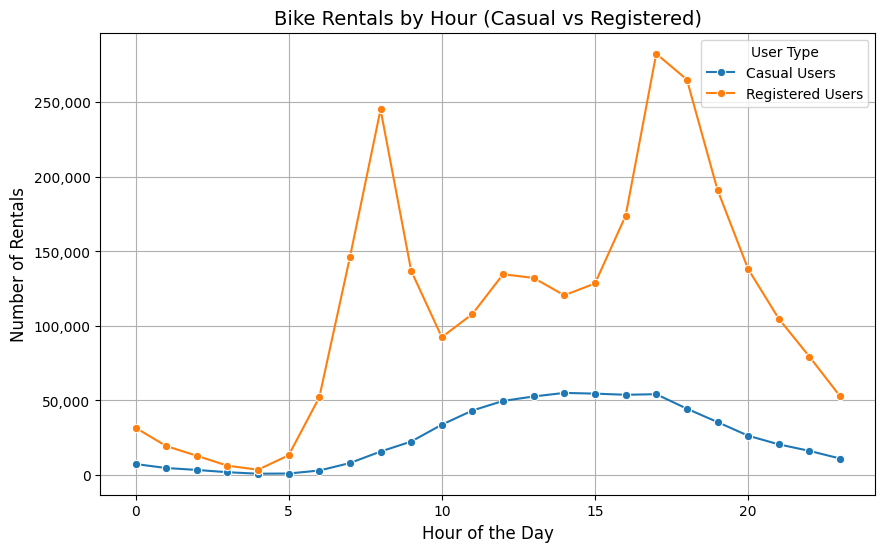

In [28]:
casual_registered_df = hour_df.groupby('hr').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

sns.lineplot(x='hr', y='casual', data=casual_registered_df, label='Casual Users', marker='o')
sns.lineplot(x='hr', y='registered', data=casual_registered_df, label='Registered Users', marker='o')

plt.title('Bike Rentals by Hour (Casual vs Registered)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Rentals', fontsize=12)

plt.grid(True)

# Memformat y-axis dengan separator ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

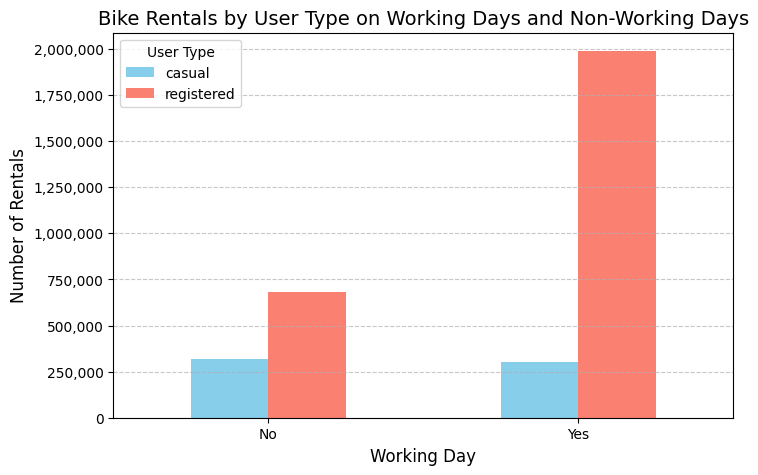

In [29]:
casual_registered_workingday = hour_df.groupby('workingday').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

plt.figure(figsize=(8, 5))

# Plot bar chart untuk casual dan registered
casual_registered_workingday.set_index('workingday')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])

plt.title('Bike Rentals by User Type on Working Days and Non-Working Days', fontsize=14)
plt.xlabel('Working Day', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Memformat y-axis dengan separator ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

<Figure size 800x500 with 0 Axes>

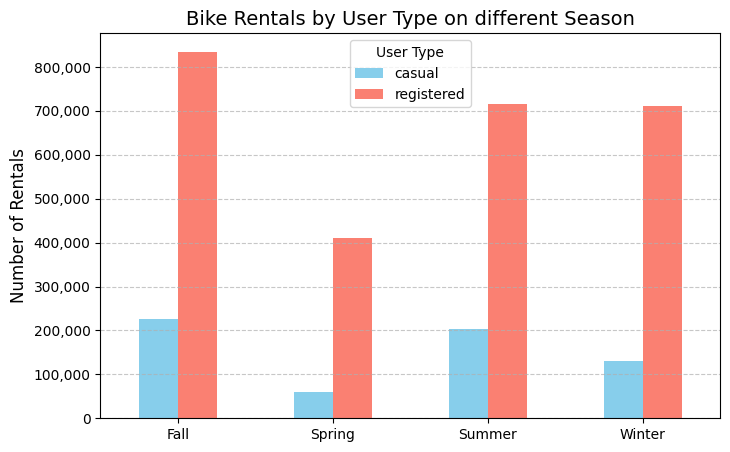

In [30]:
casual_registered_season = hour_df.groupby('season').agg({
    'casual': 'sum',
    'registered': 'sum'
}).reset_index()

plt.figure(figsize=(8, 5))

# Plot bar chart untuk casual dan registered
casual_registered_season.set_index('season')[['casual', 'registered']].plot(kind='bar', figsize=(8,5), color=['skyblue', 'salmon'])

plt.title('Bike Rentals by User Type on different Season', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Number of Rentals', fontsize=12)

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Memformat y-axis dengan separator ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.legend(title='User Type')

**Insight:**
- Dari hasi visualisasi yang dilakukan, kita dapat melihat pola penyewaan sepeda dengan lebih jelas pada musim dan bulan tertentu.
- Pada tahap exploratory data analysis, kita dapat melihat bahwa jumlah penyewa terdaftar kemungkinan besar mayoritar merupakan golongan pekerja. Dengan visualisasi data, kita dapat melihat dengan lebih jelas perbedaan jumlah pengguna kasual dan terdaftar pada jam-jam tertentu dan hari-hari kerja.

## Conclusion
* **Conclusion pertanyaan 1**:
Pada hasil analisa pertanyaan pertama, kita menemukan bahwa terdapat pola dalam penyewaan sepeda pada musim dan bulan - bulan tertentu. Kita dapat melihat bahwa jumlah penyewa menurun pada musim semi dan bulan-bulan awal dan akhir tahun yang kemungkinan besar dipengaruhi oleh hari libur yang panjang. Hal ini juga sejalan dengan penemuan hasil analisa pertanyaan 2 yang mendapatkan bahwa kebanyakan pengguna terdaftar aktif pada jam - jam kerja dan hari kerja yang menandakan bahwa kalangan pekerja merupakan salah satu kategori penyewa terbanyak.

* **Conclusion pertanyaan 2**:
Pada hasil analisa pertanyaan 2, kita menemukan bahwa sebagian besar penyewa sepeda yang terdaftar merupakan pekerja yang diindikasikan dengan kenaikan jumlah penyewa pendaftar pada hari kerja dan pada jam - jam kerja.

## Dashboard preparation

Karena kedua data yang kita miliki merupakan data yang sama dan hanya berbeda pada basis waktunya, kita akan menggunakan keduanya untuk pembuatan dashboard.